In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [5]:
titanic_data=pd.read_csv('titanic.csv')#it is the famous titanic dataset which can be easily downloaded
titanic_data.head(1)#we are basically predicting whether or not a passenger survives or not(i.e binary classification)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


In [3]:
print("Number of passengers in original data :  "+ str(len(titanic_data.index)))

Number of passengers in original data :  1310


In [5]:
str(len(titanic_data.index))#to basically check the number of rows in the csv file

'1310'

## Analyzing data

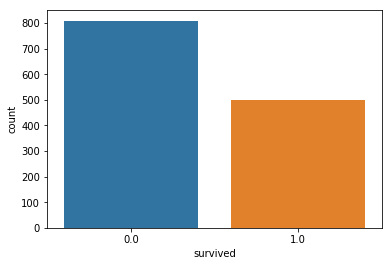

In [4]:
sns.countplot(x='survived', data=titanic_data);#to check how various columns in our dataset are related to each other

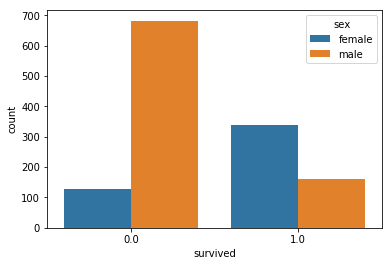

In [5]:
sns.countplot(x='survived', hue='sex',data=titanic_data);

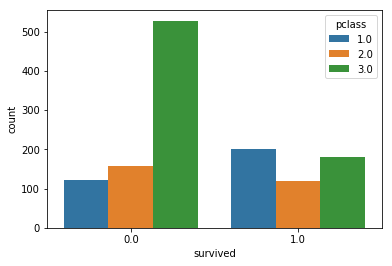

In [6]:
sns.countplot(x='survived', hue='pclass',data=titanic_data);

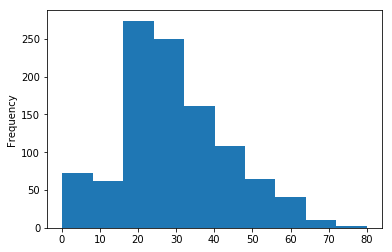

In [7]:
titanic_data['age'].plot.hist();

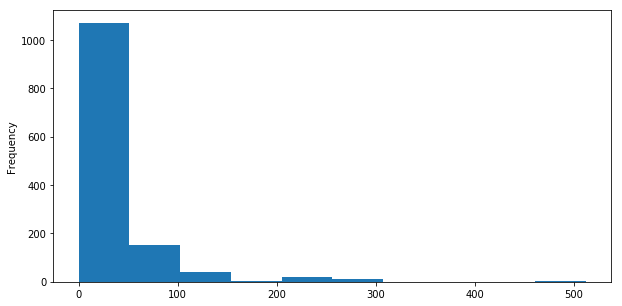

In [8]:
titanic_data['fare'].plot.hist(figsize=(10,5));

In [9]:
titanic_data.info()#the following information mainly shows how many rows have "non-null" values in each column like pclass,survived etc..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


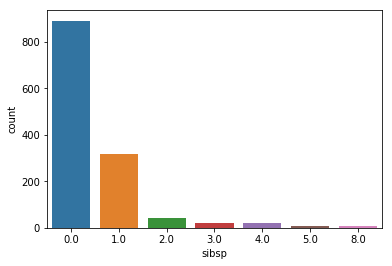

In [10]:
sns.countplot(x='sibsp',data=titanic_data);#'sibsp' represents the number of siblings 

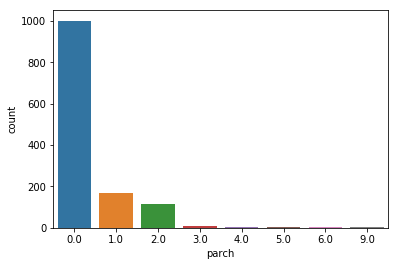

In [11]:
#parch==> number of parents boarded the titanic
sns.countplot(x='parch',data=titanic_data);

## Data Wrangling
# To remove missing data and to remove unnecessary columns

In [12]:
titanic_data.isnull()# it returns true if there is a null value else it returns false

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False,True,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [10]:
titanic_data.isnull().sum()#it is used to check how many rows have null values corresponding to each column

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

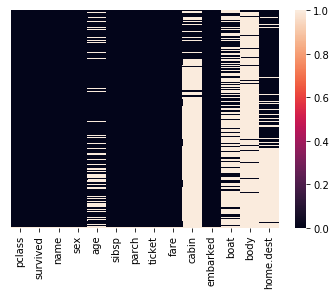

In [11]:
#heatmap to see missing value black and white
sns.heatmap(titanic_data.isnull(), yticklabels=False);#the small white horizontal lines in this heatmap shows the null values in each column,so the "body" column has the most number of null values
#and pclass,survived,name etc have zero null values

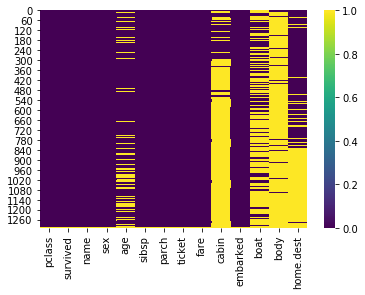

In [14]:
#heatmap to see missing value (color map)
sns.heatmap(titanic_data.isnull(), cmap='viridis');

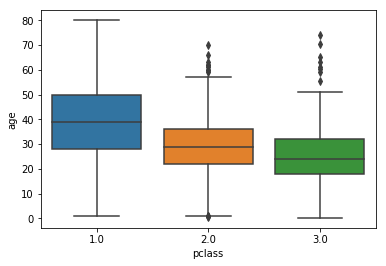

In [56]:
# age comparison among passengers using box plot
sns.boxplot(x='pclass', y='age', data=titanic_data);

In [57]:
# To remove data missing data or imputation of data
titanic_data.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


In [15]:
# remove column which hold more number of missing values
titanic_data.drop('cabin', axis=1, inplace=True)

In [16]:
titanic_data.drop('body', axis=1, inplace=True)

In [17]:
titanic_data.drop('boat', axis=1, inplace=True)

In [18]:
titanic_data.drop('home.dest', axis=1, inplace=True)

In [19]:
titanic_data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S


In [63]:
# drop NA value from all other existing column like age, etc

In [20]:
titanic_data.dropna(inplace=True)

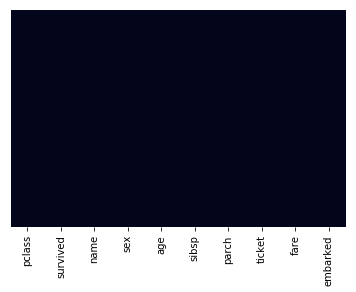

In [21]:
# to check dataset without NA value
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False);

In [22]:
# To check numner of NA in each columns
titanic_data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [67]:
# see in the data set we have some columns which contain string as value
# to apply regression(Logistic) we need to convert this string
#value as discret/categorical value because logistic reg. just take 2 values(0/1)

In [68]:
titanic_data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S


In [23]:
# use pandas over sex coloumns to combind male and female into one columns
pd.get_dummies(titanic_data['sex'])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [24]:
# use pandas over sex coloumns to combined male and female into one columns
sex=pd.get_dummies(titanic_data['sex'], drop_first=True)

In [25]:
sex.head(5)#only 1 column is enough to decide male or female

,male
0,0
1,1
2,0
3,1
4,0


In [26]:
# use pandas to change embark columns from string value to numerical
embark=pd.get_dummies(titanic_data['embarked'])
embark

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [27]:
embark=pd.get_dummies(titanic_data['embarked'],drop_first=True)

In [28]:
embark#here 2 columns are enough

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,0


In [29]:
pcl=pd.get_dummies(titanic_data['pclass'],drop_first=True)

In [30]:
# if both columns 2 and 3 value are zero (0, 0) then passengers travel in 1st class.
pcl.head(5)

,2.0,3.0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [77]:
# Now all values are categorical
#concatinate all the new rows into a dataset/DataFrame

In [31]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,Q,S,2.0,3.0
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,0,0,1,0,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,1,0,1,0,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,0,0,1,0,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,1,0,1,0,0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,0,0,1,0,0


In [32]:
#Drop unnecessary columns like pclass, embarked, sex
titanic_data.drop(['sex','name','ticket','embarked'], axis=1, inplace=True)

In [33]:
titanic_data.head(5)

,pclass,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [34]:
titanic_data.drop('pclass', axis=1, inplace=True)#inplace =True means effect is permanent in the table

In [127]:
titanic_data.head(2)

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0


###Train Data

In [105]:
X=titanic_data.drop('survived', axis=1)#take every column expect 'supervised' as 'x'
y=titanic_data['survived']#the 'supervised' column only contributes to y

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
logmodel=LogisticRegression()

In [110]:
logmodel.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
predictions=logmodel.predict(X_test)

In [112]:
print(predictions)

[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0.]


In [113]:
from sklearn.metrics import classification_report

In [114]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n         0.0       0.83      0.80      0.81       188\n         1.0       0.71      0.75      0.73       125\n\n   micro avg       0.78      0.78      0.78       313\n   macro avg       0.77      0.77      0.77       313\nweighted avg       0.78      0.78      0.78       313\n'

In [115]:
# to determine accuracy we can use confusion matrix
from sklearn.metrics import confusion_matrix

In [116]:
confusion_matrix(y_test, predictions)

array([[150,  38],
       [ 31,  94]], dtype=int64)

In [117]:
#calculation of accutacy
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_test, predictions)

0.7795527156549521

In [128]:
# Titanic data predictions using only one row data set
data1=X_test.head(3)

In [129]:
data1

,age,sibsp,parch,fare,male,Q,S,2.0,3.0
848,41.0,2.0,0.0,14.1083,1,0,1,0,1
303,64.0,1.0,0.0,75.2500,1,0,0,0,0
562,30.0,0.0,0.0,12.3500,0,1,0,1,0


In [72]:
#X=data1.drop('survived', axis=1)
#y=data1['survived']

In [130]:
y1=y_test.head(3)

In [131]:
y1

848    0.0
303    0.0
562    1.0
Name: survived, dtype: float64

In [132]:
predictions1=logmodel.predict(data1)

In [133]:
print(predictions1)

[0. 0. 1.]


In [134]:
predictions1>0.5

array([False, False,  True])

In [135]:
from sklearn.metrics import classification_report

In [137]:
classification_report(y1, predictions1)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00         2\n         1.0       1.00      1.00      1.00         1\n\n   micro avg       1.00      1.00      1.00         3\n   macro avg       1.00      1.00      1.00         3\nweighted avg       1.00      1.00      1.00         3\n'

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(y1, predictions1)

array([[2, 0],
       [0, 1]], dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(y1, predictions1)



1.0